# Example: growth of perturbations

This example is similar to the simulations in [1909.11678](https://arxiv.org/abs/1909.11678)/[10.1103/PhysRevLett.124.061301](https://doi.org/10.1103/PhysRevLett.124.061301).

## Set up Julia environment

In [1]:
VERSION

v"1.10.2"

In [2]:
import Pkg
Pkg.activate(mktempdir())

Pkg.add("CSV")
Pkg.add("CairoMakie")
Pkg.add("LaTeXStrings")
Pkg.add("NPZ")
Pkg.add("Unitful")
Pkg.add("Printf")
Pkg.develop(path=joinpath(@__DIR__, ".."))  # Load version of UltraDark in this repo

  Activating new project at `/tmp/jl_UiOOym`
   Resolving package versions...
    Updating `/tmp/jl_UiOOym/Project.toml`
  [336ed68f] + CSV v0.10.14
    Updating `/tmp/jl_UiOOym/Manifest.toml`
  [336ed68f] + CSV v0.10.14
  [944b1d66] + CodecZlib v0.7.4
  [34da2185] + Compat v4.14.0
  [9a962f9c] + DataAPI v1.16.0
  [e2d170a0] + DataValueInterfaces v1.0.0
  [48062228] + FilePathsBase v0.9.21
  [842dd82b] + InlineStrings v1.4.0
  [82899510] + IteratorInterfaceExtensions v1.0.0
  [bac558e1] + OrderedCollections v1.6.3
  [69de0a69] + Parsers v2.8.1
  [2dfb63ee] + PooledArrays v1.4.3
  [aea7be01] + PrecompileTools v1.2.1
  [21216c6a] + Preferences v1.4.3
  [91c51154] + SentinelArrays v1.4.1
  [3783bdb8] + TableTraits v1.0.1
  [bd369af6] + Tables v1.11.1
  [3bb67fe8] + TranscodingStreams v0.10.7
  [ea10d353] + WeakRefStrings v1.4.2
  [76eceee3] + WorkerUtilities v1.6.1
  [56f22d72] + Artifacts
  [2a0f44e3] + Base64
  [ade2ca70] + Dates
  [9fa8497b] + Future
  [b77e0a4c] + InteractiveUtils
  [

  [c5fb5394] + Xorg_xtrans_jll v1.5.0+0
  [9a68df92] + isoband_jll v0.2.3+0
  [a4ae2306] + libaom_jll v3.4.0+0
  [0ac62f75] + libass_jll v0.15.1+0
  [f638f0a6] + libfdk_aac_jll v2.0.2+0
  [b53b4c65] + libpng_jll v1.6.43+1
  [075b6546] + libsixel_jll v1.10.3+0
  [f27f6e37] + libvorbis_jll v1.3.7+1
  [1270edf5] + x264_jll v2021.5.5+0
  [dfaa095f] + x265_jll v3.5.0+0
  [0dad84c5] + ArgTools v1.1.1
  [8bf52ea8] + CRC32c
  [8ba89e20] + Distributed
  [f43a241f] + Downloads v1.6.0
  [7b1f6079] + FileWatching
  [4af54fe1] + LazyArtifacts
  [b27032c2] + LibCURL v0.6.4
  [76f85450] + LibGit2
  [ca575930] + NetworkOptions v1.2.0
  [44cfe95a] + Pkg v1.10.0
  [3fa0cd96] + REPL
  [1a1011a3] + SharedArrays
  [6462fe0b] + Sockets
  [2f01184e] + SparseArrays v1.10.0
  [10745b16] + Statistics v1.10.0
  [4607b0f0] + SuiteSparse
  [a4e569a6] + Tar v1.10.0
  [deac9b47] + LibCURL_jll v8.4.0+0
  [e37daf67] + LibGit2_jll v1.6.4+0
  [29816b5a] + LibSSH2_jll v1.11.0+1
  [c8ffd9c3] + MbedTLS_jll v2.28.2+1
  [14a

In [3]:
using CairoMakie
using CSV
using NPZ
using Random: randn!
using Test
using UltraDark
using Unitful
using LaTeXStrings

In [4]:
Threads.nthreads()

16

## Units

In [5]:
mpl = uconvert(u"kg", sqrt(Unitful.ħ * Unitful.c / Unitful.G))
Mpl = uconvert(u"kg", sqrt(Unitful.ħ * Unitful.c / 8 / π / Unitful.G))

4.341358399139357e-9 kg

In [6]:
tpl = uconvert(u"s", sqrt(Unitful.ħ * Unitful.G / Unitful.c^5))

5.391246448313604e-44 s

In [7]:
lpl = uconvert(u"m", sqrt(Unitful.ħ * Unitful.G / Unitful.c^3))

1.616255024423705e-35 m

In [8]:
m = 6.35e-6Mpl

2.756762583453492e-14 kg

In [9]:
hbar = Unitful.ħ
G = Unitful.G
Ωm = 1.0

1.0

In [10]:
H0 = sqrt(1/3)m / (tpl*mpl)

1.3564506032609175e37 s^-1

In [11]:
t_code = (3 / 8 / π * H0^2 * Ωm)^(-1/2)

2.1338079037120107e-37 s

In [12]:
uconvert(u"s", t_code)

2.1338079037120107e-37 s

In [13]:
l_code = (hbar / m)^(1/2) * (3 / 8 / π * H0^2 * Ωm)^(-1/4)

2.8570382677283864e-29 J^1/2 s kg^-1/2

In [14]:
uconvert(u"m", l_code)

2.857038267728386e-29 m

In [15]:
m_code = (hbar / m)^(3/2) * (3 / 8 / π * H0^2 * Ωm)^(+1/4) / G

0.007674176966402799 J^3/2 s^3 kg^-1/2 m^-3

In [16]:
uconvert(u"kg", m_code)

0.007674176966402799 kg

## Define initial conditions

In [17]:
function x(k, a)
    m = 1
    H0 = 1
    k^2 / (m * H0 * a^0.5)
end

function δ_g(x)
    if x == 0
        0
    else
        -(3/x^2 - 1) * cos(x) - 3/x * sin(x)
    end
end

function S_g(x)
    if x == 0
        0
    else
        (6/x^3 + 3/x) * cos(x) + (6/x^2 - 1) * sin(x)
    end
end

function propagate_to!(grids, A_k, a)
    # Density perturbation
    δ_k = similar(grids.ρk)
    δ_k .= A_k .* δ_g.(x.(grids.rk, a))
    δ_k[1, 1, 1] = 0

    # Phase perturbation
    S_k = similar(grids.ρk)
    S_k .= A_k .* S_g.(x.(grids.rk, a))

    # Field perturbation
    grids.ψx .= (1+0im .+ grids.rfft_plan \ δ_k).^0.5 .* exp.(im .* (grids.rfft_plan \ S_k))
    
    return
end

function propagate_to(grids, A_k, a)
    grids_new = deepcopy(grids)
    
    propagate_to!(grids_new, A_k, a)
    
    grids_new
end

propagate_to (generic function with 1 method)

In [18]:
a_end = 1
t_end = (2.0/(3.0 * H0))
t_end_code_units = uconvert(Unitful.NoUnits, t_end/t_code)

function a(t)
    a_end * (t/t_end_code_units)^(2/3)
end

function t(a)
    t_end_code_units * (a/a_end)^(3/2)
end

t (generic function with 1 method)

In [19]:
L_horizon_end = uconvert(Unitful.NoUnits, 1/(H0*tpl) * lpl / l_code)

0.7735718587191165

In [20]:
resol = 64
box_length = 20 * L_horizon_end

15.47143717438233

In [21]:
# Define initial conditions

a_init = 1e0
a_final = 1e2

@show t_init = t(a_init)
@show t_final = t(a_final)

grids = UltraDark.Grids(box_length, resol)

A_k = similar(grids.ρk)
randn!(A_k)
A_k[grids.rk .> maximum(grids.rk[1, 1, :])] .= 0
A_k *= 1e-3

propagate_to!(grids, A_k, a_init)

t_init = t(a_init) = 0.23032943298089031
t_final = t(a_final) = 230.32943298089032


In [22]:
output_dir = joinpath(mktempdir(), "output")
num_saves = 100

output_a = exp10.(range(log10(a_init), log10(a_final), num_saves))

output_times = t.(output_a)

output_config = OutputConfig(output_dir, output_times, summary_statistics=(Summary.SimulationTime,Summary.MeanDensity,Summary.MaxDensity,Summary.RmsDensityContrast,Summary.ScaleFactor,Summary.TimeStep))

options = Config.SimulationConfig(a=a)

SimulationConfig(a, 0.7853981633974483, 1.0e-6, TimeStepOptions(10, 1.0))

In [23]:
options

SimulationConfig(a, 0.7853981633974483, 1.0e-6, TimeStepOptions(10, 1.0))

## Run simulation

In [24]:
@time simulate!(grids, options, output_config)

[ Info: Reached time 0.2469747012496321
[ Info: Reached time 0.2648228768157726
[ Info: Reached time 0.2839608904480305
[ Info: Reached time 0.3044819551602874
[ Info: Reached time 0.32648602021199313
[ Info: Reached time 0.3500802579179202
[ Info: Reached time 0.37537958563830565
[ Info: Reached time 0.4025072254917723
[ Info: Reached time 0.43159530451714545
[ Info: Reached time 0.4627854982072991
[ Info: Reached time 0.49622972054940406
[ Info: Reached time 0.5320908639324684
[ Info: Reached time 0.5705435925259408
[ Info: Reached time 0.6117751929935804
[ Info: Reached time 0.6559864866860559
[ Info: Reached time 0.703392807755169
[ Info: Reached time 0.7542250519536762
[ Info: Reached time 0.80873080122896
[ Info: Reached time 0.86717552958796
[ Info: Reached time 0.9298438961066127
[ Info: Reached time 0.9970411313814933
[ Info: Reached time 1.0690945241764633
[ Info: Reached time 1.146355015505145
[ Info: Reached time 1.2291989079133026
[ Info: Reached time 1.31802969828632
[ In

 19.749397 seconds (1.42 M allocations: 3.063 GiB, 0.36% gc time, 7.50% compilation time: 67% of which was recompilation)


## Check output

In [25]:
summary = CSV.File("$(output_config.directory)/summary.csv");

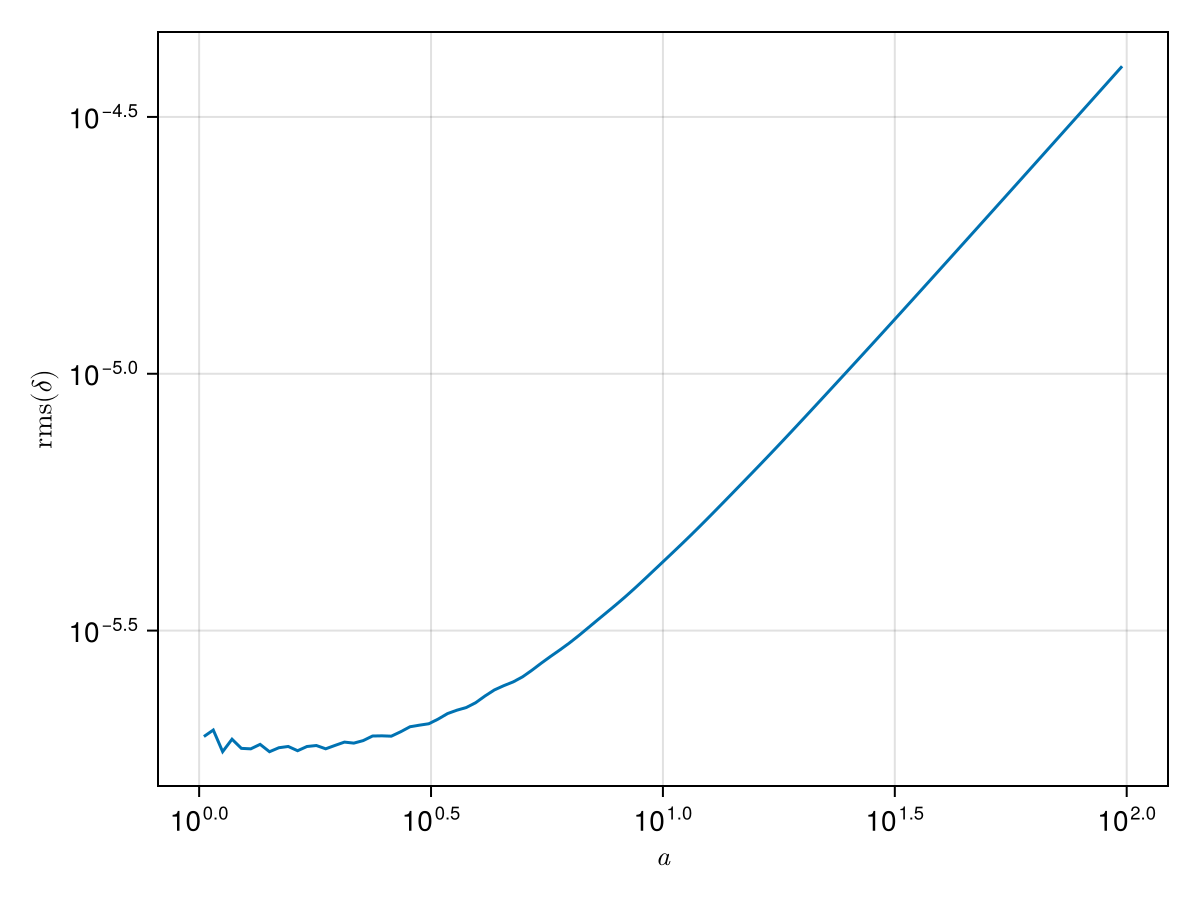

In [26]:
fig_rms = Figure()
ax = Axis(
    fig_rms[1,1], 
    xlabel=L"$a$",
    ylabel=L"$\mathrm{rms}(\delta)$",
    xscale=log10,
    yscale=log10,
)
lines!(
    summary.a, summary.δx_rms;
)
save("rms_delta.pdf", fig_rms)
fig_rms

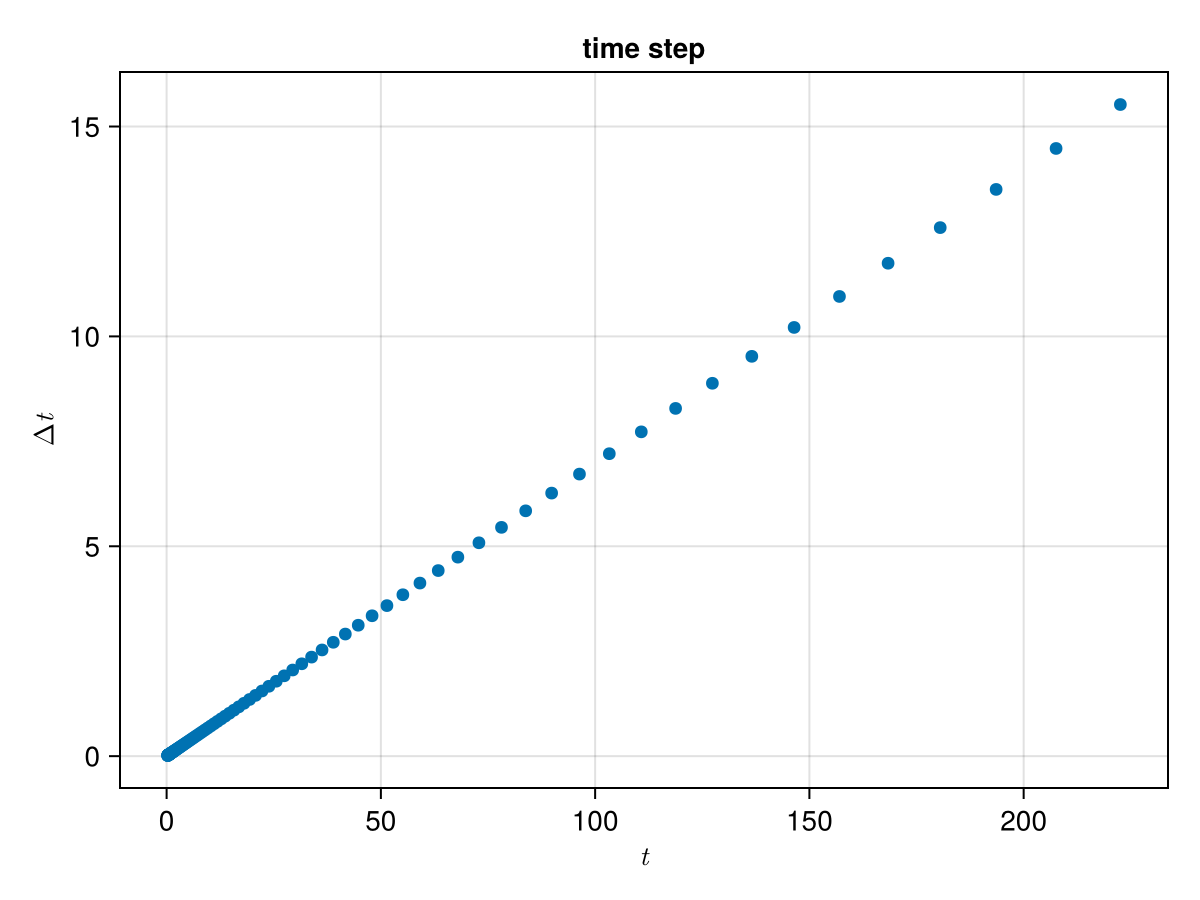

In [27]:
fig_Δt = Figure()
ax_Δt = Axis(
    fig_Δt[1, 1],
    title="time step",
    xlabel=L"$t$",
    ylabel=L"$\Delta t$",
)
scatter!(
    summary.t, summary.Δt,
)
fig_Δt

In [28]:
rho_init = npzread("$(output_config.directory)/rho_1.npy");
rho_last = npzread("$(output_config.directory)/rho_$(length(output_times)).npy");

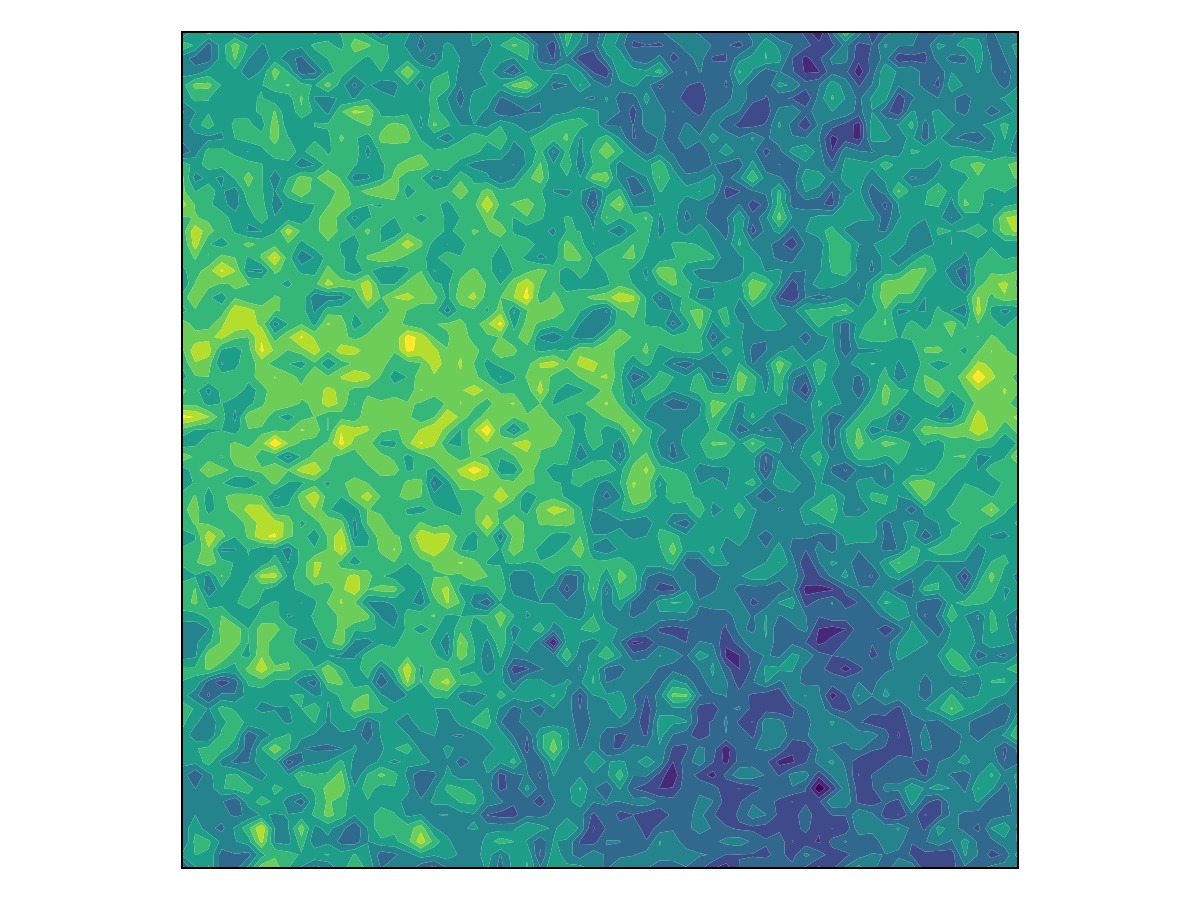

In [29]:
fig_init = Figure()
ax_init = Axis(
    fig_init[1, 1],
    aspect=DataAspect(),
)
hidedecorations!(ax_init)

contourf!(ax_init, rho_init[1, :, :] .- 1)

fig_init

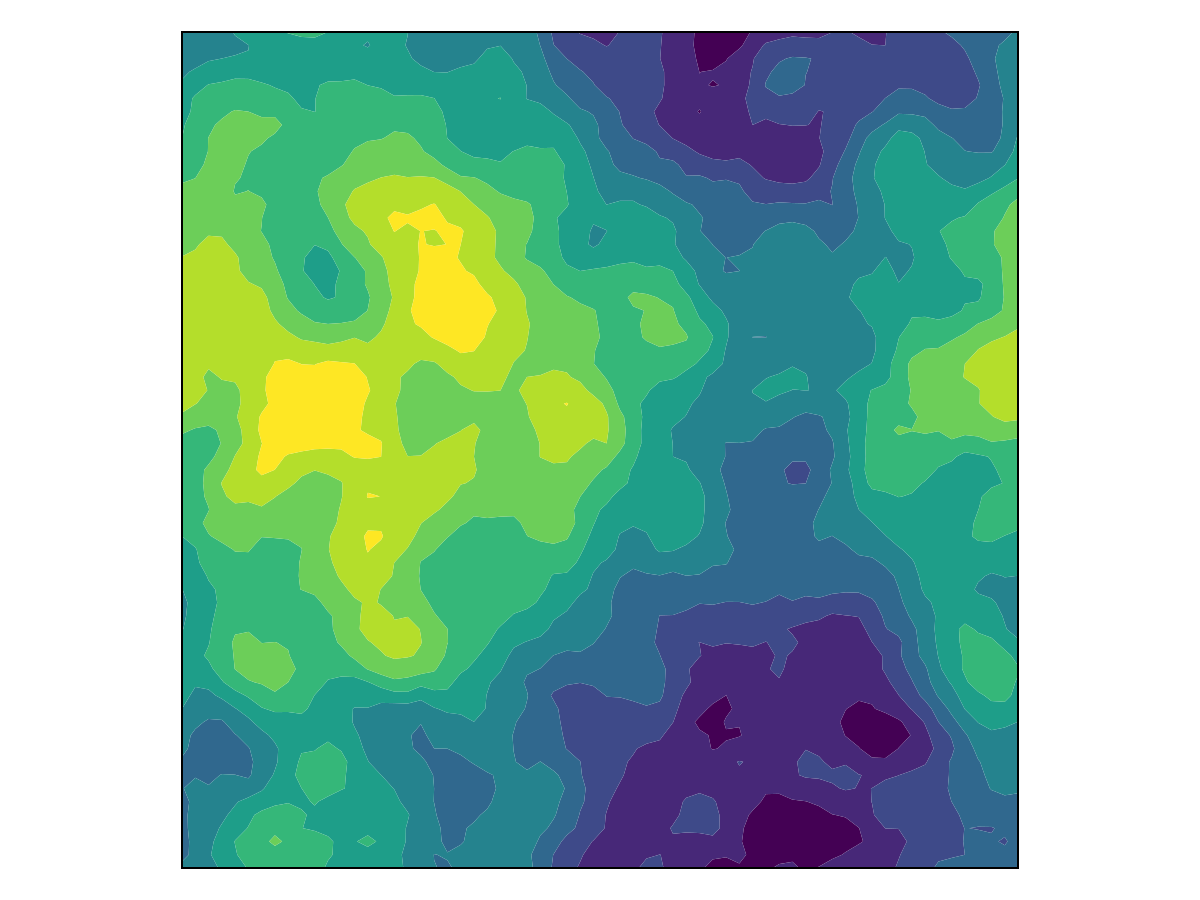

In [30]:
fig_last = Figure()
ax_last = Axis(
    fig_last[1, 1],
    aspect=DataAspect(),
)
hidedecorations!(ax_last)

contourf!(ax_last, rho_last[1, :, :] .- 1)

fig_last

In [31]:
fig_anim = Figure(size=(400, 300))
ax_anim = Axis(
    fig_anim[1, 1],
    aspect=DataAspect(),
)

hidedecorations!(ax_anim)

δ_lims = extrema(rho_last.-1)

cb_density = Colorbar(
    fig_anim[1, 2],
    limits=δ_lims,
    label = L"$\rho/\rho_{\text{crit}} - 1$",
)

frame = Observable(1)

rho = lift(i -> npzread(joinpath(output_config.directory, "rho_$(i).npy"))[:, :, resol÷2], frame)
δ = @lift($rho .- 1)

contourf!(
    ax_anim,
    grids.x[:, 1, 1], grids.y[1, :, 1],
    δ,
    colorrange = δ_lims,
)

Record(fig_anim, 1:length(output_times); framerate = 15) do f
    frame[] = f
end

VideoStream(Base.PipeEndpoint(RawFD(59) open, 0 bytes waiting), Process(setenv(`/home/nathan/.julia/artifacts/b1158959679bd9be00bd4fbf143a50e9c60e77e0/bin/ffmpeg -y -loglevel quiet -threads 16 -framerate 15 -pixel_format rgb24 -f rawvideo -s:v 800x600 -r 15 -i pipe:0 -vf vflip -profile:v high422 -crf 20 -preset slow -c:v libx264 -pix_fmt yuv420p -an '/tmp/jl_mVwXtl/##video#299.mp4'`,["_CE_M=", "EDITOR=vim", "PATH=/home/nathan/.julia/artifacts/d11639e2a53726f2593e25ba98ed7b416f62bbc5/bin:/home/nathan/.julia/artifacts/a5fef397d004f3b9cc0ad9a1274413988a3ee522/bin:/home/nathan/.julia/artifacts/2bce74229f51de64c33433272240af5734619b33/bin:/home/nathan/.julia/artifacts/387d89822da323c098aba6f8ab316874d4e90f2e/bin:/home/nathan/.julia/artifacts/e19f3bb2eef5fb956b672235ea5323b5be9a0626/bin:/home/nathan/.julia/artifacts/595f9476b128877ab5bf73883ff6c8dc8dacfe66/bin:/home/nathan/.julia/artifacts/587de110e5f58fd435dc35b294df31bb7a75f692/bin:/home/nathan/.julia/artifacts/fc239b3ff5739aeab252bd154fa4dd045fefe629/bin:/home/nathan/.julia/artifacts/4b858830ec17854ddd66b28a0f7c00193ec8b4c0/bin:/home/nathan/.julia/artifacts/b1158959679bd9be00bd4fbf143a50e9c60e77e0/bin:/home/nathan/.julia/conda/3/bin:/home/nathan/gems/bin:/home/nathan/.config/nvm/versions/node/v18.16.1/bin:/home/nathan/gems/bin:/home/nathan/anaconda3/bin:/home/nathan/anaconda3/condabin:/home/nathan/.juliaup/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/home/nathan/.local/bin:/home/nathan/bin:/home/nathan/.cargo/bin:/home/nathan/.local/bin:/home/nathan/bin:/home/nathan/.cargo/bin", "LIBVA_DRIVERS_PATH=/snap/alacritty/70/usr/lib/x86_64-linux-gnu/dri", "SNAP=/snap/alacritty/70", "SNAP_CONTEXT=jw1_gKesdzYK5fipygyEPZDOkLYKlM7epsmLZI-JAXC2wH0s6Fg9", "QT_ACCESSIBILITY=1", "GST_PLUGIN_PATH=/snap/alacritty/70/usr/lib/x86_64-linux-gnu/gstreamer-1.0", "GDK_PIXBUF_MODULEDIR=/snap/alacritty/70/usr/lib/x86_64-linux-gnu/gdk-pixbuf-2.0/2.10.0/loaders", "LD_LIBRARY_PATH=/home/nathan/.julia/artifacts/f839432e3d2904a5c847b217ef0c0f489377ecc5/lib:/home/nathan/.julia/juliaup/julia-1.10.2+0.x64.linux.gnu/bin/../lib/julia:/home/nathan/.julia/artifacts/4fff8dd69d1996234cc96473780198ebc7b3809c/lib:/home/nathan/.julia/artifacts/d11639e2a53726f2593e25ba98ed7b416f62bbc5/lib:/home/nathan/.julia/artifacts/e4e0c1bb8f52a7a9d586af15bc1713e83c1f42af/lib:/home/nathan/.julia/artifacts/d00220164876dea2cb19993200662745eed5e2db/lib:/home/nathan/.julia/artifacts/a5fef397d004f3b9cc0ad9a1274413988a3ee522/lib:/home/nathan/.julia/artifacts/dc526f26fb179a3f68eb13fcbe5d2d2a5aa7eeac/lib:/home/nathan/.julia/artifacts/a2422057ec21f1a81d5235915c6657176c30c26b/lib:/home/nathan/.julia/artifacts/648a32a349aac06f19b6bfed47f0b822b4ef28c3/lib:/home/nathan/.julia/artifacts/909c4b91b22279c16eaf5a1de24767fd30e25f28/lib:/home/nathan/.julia/artifacts/07ceef013364157053410cf114bae82d90d9bcaa/lib:/home/nathan/.julia/artifacts/0e20c5ca9971ebe38489f3967283655f0e952cd1/lib:/home/nathan/.julia/artifacts/2bce74229f51de64c33433272240af5734619b33/lib:/home/nathan/.julia/artifacts/387d89822da323c098aba6f8ab316874d4e90f2e/lib:/home/nathan/.julia/artifacts/16154f990153825ec24b52aac11165df2084b9dc/lib:/home/nathan/.julia/artifacts/92111ef825c608ea220f8e679dd8d908d7ac5b83/lib:/home/nathan/.julia/artifacts/f3ec73d7bf2f4419ba0943e94f7738cf56050797/lib:/home/nathan/.julia/artifacts/bd965e3c7f9460155f06361da380c63fa0351ef6/lib:/home/nathan/.julia/artifacts/060cf7829c3363638c29228ea4ab0bd033d8eab0/lib:/home/nathan/.julia/artifacts/066b74f697b047bab2476f57bb0c7a29bead921c/lib:/home/nathan/.julia/artifacts/1e69ef9fbf05e2896d3cb70eac8080c4d10f8696/lib:/home/nathan/.julia/artifacts/fc6071b99b67da0ae4e49ebab70c369ce9a76c9e/lib:/home/nathan/.julia/artifacts/527e66fb9b12dfd1f58157fe0b3fd52b84062432/lib:/home/nathan/.julia/artifacts/921a059ebce52878d7a7944c9c345327958d1f5b/lib:/home/nathan/.julia/artifacts/483b800129dc5270954d89e14ef5220b9f49838e/lib:/home/nathan/.julia/artifacts/62c010876222f83fe8878bf2af0e36

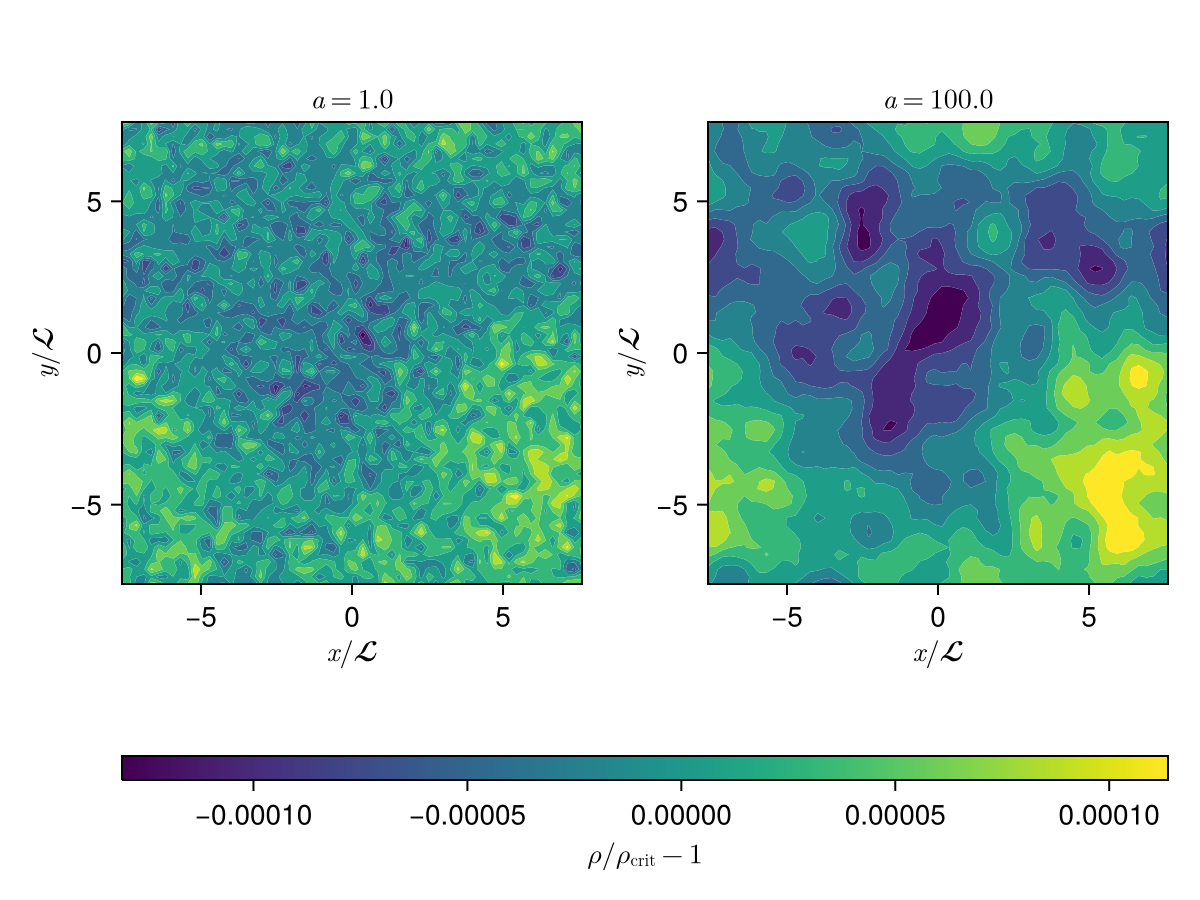

In [32]:
δ_lims = extrema(rho_last.-1)

fig_joss = Figure()

cb_density = Colorbar(
    fig_joss[2, 1:2],
    limits=δ_lims,
    label = L"$\rho/\rho_{\text{crit}} - 1$",
    vertical=false,
    flipaxis=false,
)

for (i, t_index) in enumerate([1, length(output_times)])
    rho = npzread(joinpath(output_dir, "rho_$(t_index).npy"))
    
    _a = [a_init, a_final][i]
    ax = Axis(
        fig_joss[1, i],
        title=L"$a = %$(_a)$",
        aspect=DataAspect(),
        xlabel=L"$x / \mathcal{L}$",
        ylabel=L"$y / \mathcal{L}$",
    )
    
    contourf!(
        grids.x[:, 1, 1], grids.y[1, :, 1],
        rho[:, :, resol÷2] .- 1,
        colorrange = δ_lims,
    )
end

save(joinpath(@__DIR__, "..", "joss", "growth_joss.pdf"), fig_joss)
fig_joss